#### Сценарий для CARPK

In [ ]:
import sys
sys.path.append('../')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = [15.0, 15.0]

In [3]:
from cropper.core import tilinig_image_and_txt_annotation as tile, create_yolo_annotation_from_img_annotation as to_yolo, split_dataset, plot_img_and_boxes
from cropper.utils_img import get_img_couple_imgtxt
from cropper.utils_img import *
from cropper.utils_core import txt_annotation_to_numpy

In [4]:
path_img = '../../exp_del/data_carpk/images/'
path_ann = '../../exp_del/data_carpk/annotation/'
dir_path = '../../exp_del/data_carpk/'
destination_path = dir_path+'crops_416x416'
req_size = (416,416)
overlap = 100

In [5]:
img_txt_couples = get_img_couple_imgtxt(path_img, path_ann, ['png', 'jpg', 'txt'])
img_txt_couples

[['../../exp_del/data_carpk/images/20161029_NTU_00064.png',
  '../../exp_del/data_carpk/annotation/20161029_NTU_00064.txt'],
 ['../../exp_del/data_carpk/images/20161029_NTU_00089.png',
  '../../exp_del/data_carpk/annotation/20161029_NTU_00089.txt'],
 ['../../exp_del/data_carpk/images/20161030_GF2_00141.png',
  '../../exp_del/data_carpk/annotation/20161030_GF2_00141.txt']]

In [6]:
for couple in img_txt_couples:
    path_img_sample, path_ann_sample = couple
    annotation_arr = txt_annotation_to_numpy(path_ann_sample)
    dir_img, dir_crop_img, dir_crop_ann = tile(dir_path, path_img_sample, req_size, overlap, 
                                                         destination_path = destination_path, annotations = annotation_arr)

In [7]:
split_dataset(dir_crop_img, ['png','jpg'], 0.8, shuffle=True)

количество изображений в train: 19, количество изображений в validation: 5
New folder "/home/vic/PycharmProjects/DS_neuro/Task/detection/MY/exp_del/data_carpk/crops_416x416/img_link_list" created for img_link_list file stores


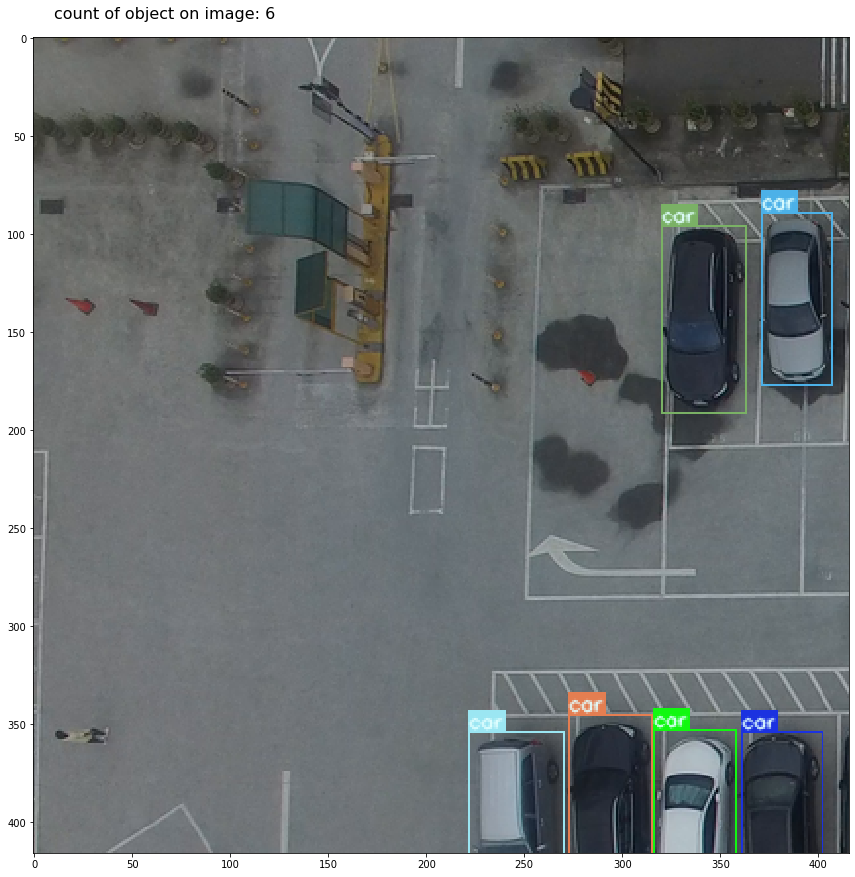

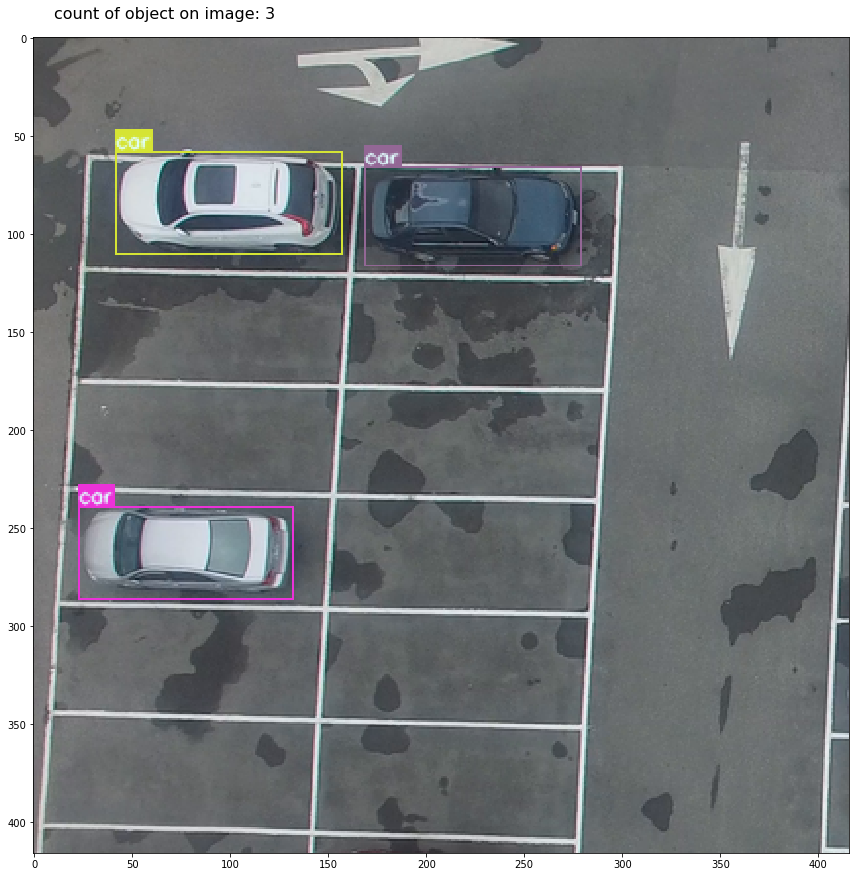

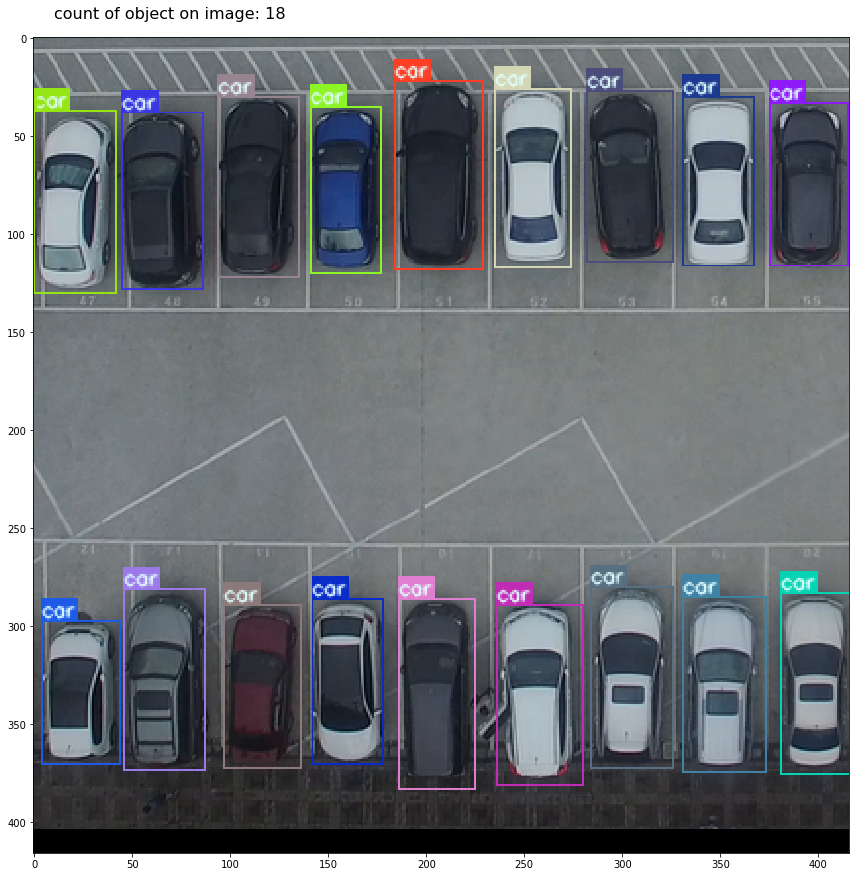

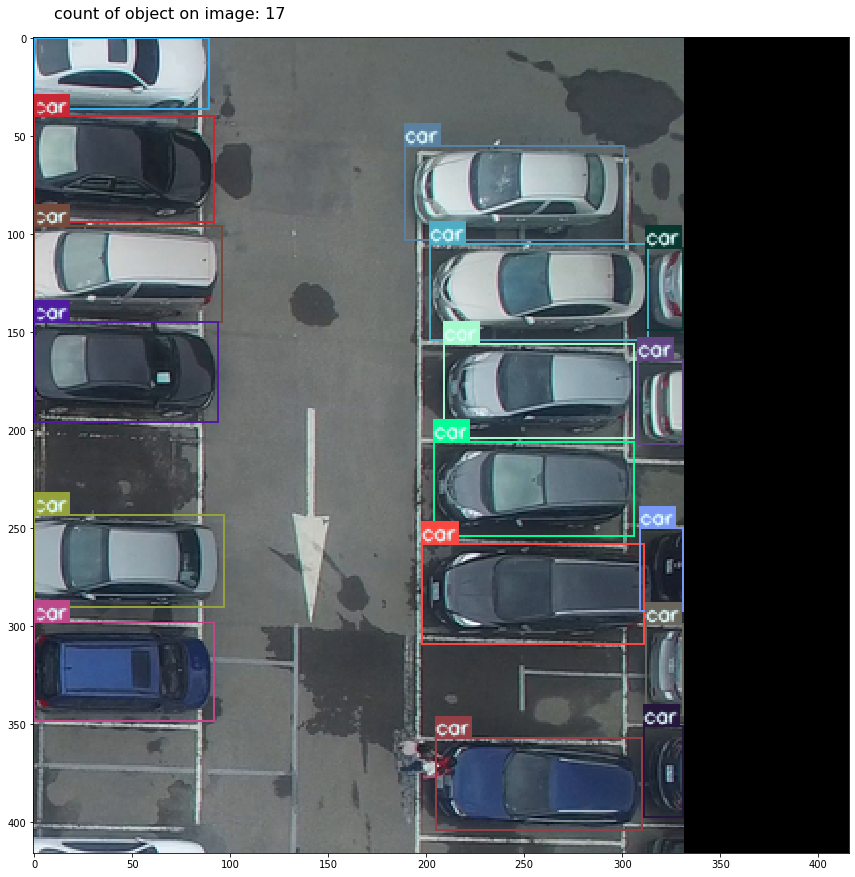

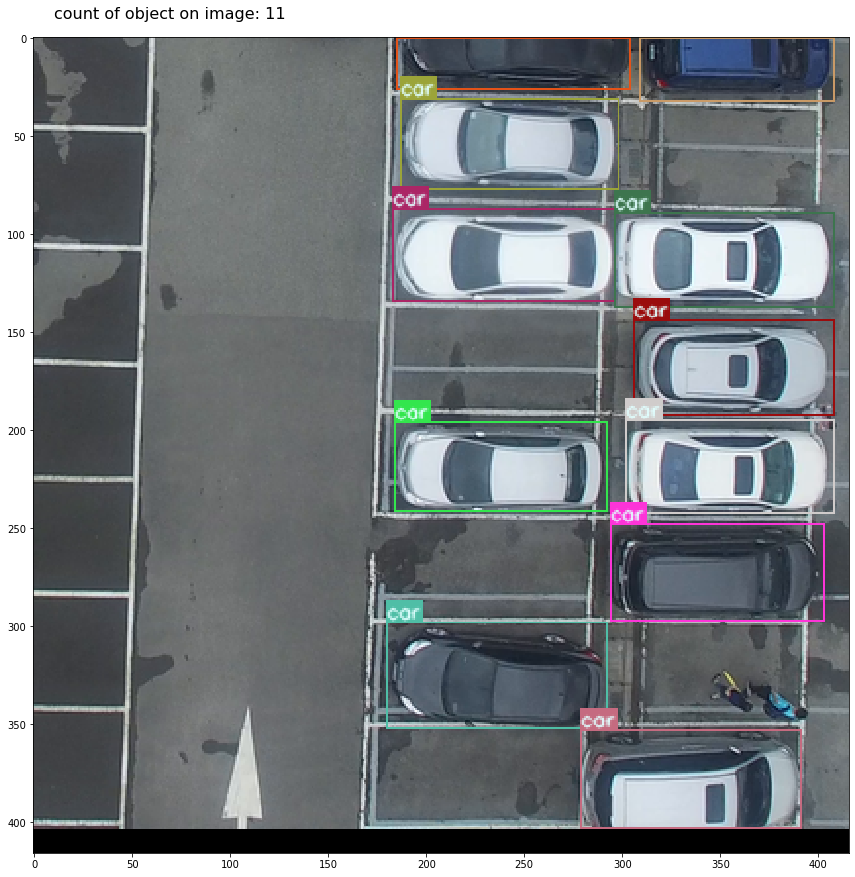

In [8]:
plot_img_and_boxes(dir_crop_img, dir_crop_ann, max_plot=5)